## Welcome!

### Some Google Colab hacks
* To run a cell, hit `Ctrl + Shift + Enter`
* To run the whole sheet, hit `Ctrl + F9`
* To run the cells above, hit `Ctrl + F8`
* To run the cells below, hit `Ctrl + F10`


# Install and import `pygismo` and other packages

`pygismo` is a small package, unknown to Google. Therefore, we have to install it locally inside the Notebook

In [1]:
# !pip install pygismo

# We use the development version of pygismo
from google.colab import drive
drive.mount('/content/drive/')

!pip install "/content/drive/MyDrive/Google Colab/pygismo/wheels/pygismo-23.9.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl"

MessageError: ignored

Now we can import it as a package

In [ ]:
import pygismo as gs

We also import `numpy` and `matplotlib`

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

For this example, we also use a file from the drive. Therefore, we mount our Google Drive

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive/')

# Constructing a 1D basis

Similar to the `1D_basis_example.ipynb`, we construct a B-spline basis with knot vector Ξ = { 0, 0, 0, 0.25, 0.50, 0.75, 1, 1, 1 }.

In [ ]:
kv = gs.nurbs.gsKnotVector(np.array([0,0,0,0.25,0.50,0.75,1,1,1]),2)
basis = gs.nurbs.gsBSplineBasis(kv)

print('The knots of the basis are:\n',basis.knots(0).get())
print('The size of the basis is: ',basis.size())

The knots of the basis are:
 [0.0, 0.0, 0.0, 0.25, 0.5, 0.75, 1.0, 1.0, 1.0]
The size of the basis is:  6


# Constructing a 2D curve

Given the 1D B-spline basis, we are going to construct a curve. A B-spline curve $\mathcal{C}:\mathbb{R}\to\mathbb{R}^d$ is defined as:

$\mathcal{C}(\xi) = \sum_{k=0}^N \varphi_k(\xi)\mathbf{B}_k$,

where $\varphi_k(\xi)$, $k=0,\dots,N$ is the $k^{\text{th}}$ basis function and $\mathbf{B}_k$ is $d$-dimensional vector representing the $k^{\text{th}}$ control point.

To define our curve, we define the control points in a matrix, with $d$ columns and $N$ rows:

In [ ]:
coefs = np.zeros((basis.size(),2))

For the sake of simplicity, we assign linearly increasing values in both columns of the matrix of control points

In [ ]:
coefs[:,0] = np.array([0,1,1,2,2,3])
coefs[:,1] = np.array([0,0,1,1,2,2])

Having the control points and the basis, we can define a B-spline curve using `pygismo.nurbs.gsBSpline`:

In [ ]:
curve = gs.nurbs.gsBSpline(basis,coefs)

By using `pygismo.nurbs.gsBSpline.coefs`, the coefficients of the B-spline curve can be accessed. This can be used to change the coefficients as well!

In [ ]:
print('The coefficients of the B-spline are:\n',curve.coefs())

The coefficients of the B-spline are:
 [[0. 0.]
 [1. 0.]
 [1. 1.]
 [2. 1.]
 [2. 2.]
 [3. 2.]]


# Plotting the curve

As in the previous example, we can define a 1D `numpy.meshgrid` of parametric coordinates. The B-spline curve is evaluated by calling `pygismo.nurbs.gsBSpline.eval`

In [ ]:
N = 100
x = np.linspace(0,1,N)
x = np.matrix(np.meshgrid(x))
y = curve.eval(x)

The curve is then plotted by plotting the *rows* of our evaluation.

**Remember**: `pygismo` uses the convention of having every evaluation point in a column.

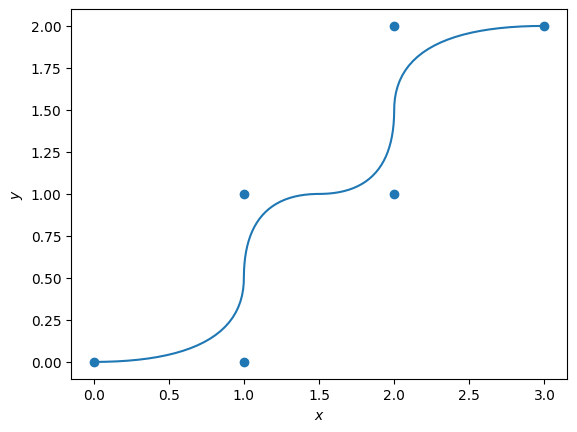

In [ ]:
plt.plot(y[0,:],y[1,:])
plt.scatter(curve.coefs()[:,0],curve.coefs()[:,1])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()

# Modifying the curve

Having the curve defined, we can modify it. We can simply change the control points using `pygismo.nurbs.gsBSpline.coefs`. For example, we move the second control point to $(0,1)$

In [ ]:
curve.coefs()[1,0] = 0
curve.coefs()[1,1] = 1

And we plot it

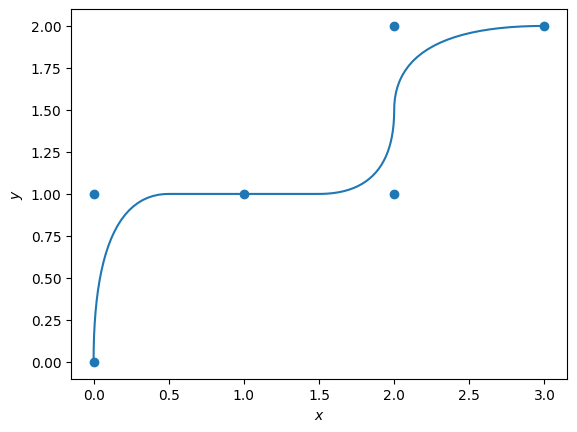

In [ ]:
y = curve.eval(x)
plt.scatter(curve.coefs()[:,0],curve.coefs()[:,1])
plt.plot(y[0,:],y[1,:])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()

# Reading a curve from a file [Fails]

An alternative way of defining a curve in `pygismo`, is to read it from an XML file. G+Smo natively uses XML as a format to read and write data.

If your drive is linked correctly, you can use the file browser (on the right) to find the path of the file `curve_example` and use that to define the `filename`. Using `gsFileData`, we can read the file.

In [ ]:
filename = "/content/drive/MyDrive/Google Colab/pygismo/filedata/curve_example.xml"
filedata = gs.io.gsFileData(filename)

The curve is stored with id 0 in the file. Hence, to read it into an object, we do

In [ ]:
XMLcurve = gs.nurbs.gsBSpline()
filedata.getId(0,XMLcurve)

AttributeError: ignored

Using the same plotting commands as before, we can plot the result

In [ ]:
y = XMLcurve.eval(x)
plt.scatter(XMLcurve.coefs()[:,0],XMLcurve.coefs()[:,1])
plt.plot(y[0,:],y[1,:])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()

AttributeError: ignored